## Librairies et fonctions utiles 

Nous allons prédire la fraude à la carte bancaire à partir des différentes valeurs du dataset. Ces données contiennent les transactions effectuées par carte de crédit en septembre 2013 par les détenteurs de cartes européennes. Cet ensemble de données présente les transactions qui ont eu lieu en deux jours, où nous avons 492 fraudes sur 284 807 transactions. L'ensemble de données est très déséquilibré, la classe positive (fraudes) représente 0,172 % de toutes les transactions.

Il ne contient que des variables d'entrée numériques qui sont le résultat d'une transformation ACP (analyse en composantes principales - une méthode de réduction de dimension). Malheureusement, pour des raisons de confidentialité, nous ne pouvons pas fournir les caractéristiques originales et plus d'informations sur le contexte des données. 

In [1]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from IPython.core.display import HTML # permet d'afficher du code html dans jupyter

Fonction pour standardiser les données quantitatives (cont_feat est une liste des colonnes correspondant à des caractéristiques quantitatives) :

In [2]:
def scale_feat(df,cont_feat) :
    df1=df
    scaler = preprocessing.RobustScaler()
    df1[cont_feat] = scaler.fit_transform(df1[cont_feat])
    return df1

Fonction pour tracer les courbes d'apprentissage sur l'ensemble d'apprentissage et l'ensemble de validation :

Fonction pour tracer la courbe ROC :

In [3]:
def plot_roc_curve(est,X_test,y_test) :
    probas = est.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')        # plus mauvaise courbe
    plt.plot([0,0,1],[0,1,1],'g:')     # meilleure courbe
    plt.xlim([-0.05,1.2])
    plt.ylim([-0.05,1.2])
    plt.ylabel('Taux de vrais positifs')
    plt.xlabel('Taux de faux positifs')
    plt.show

## Traitement du dataset 

In [4]:
df = pd.read_csv("data/creditcard.csv")

In [5]:
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [6]:
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.Class.value_counts() 

Class
0    284315
1       492
Name: count, dtype: int64

On a un dataset très deséquilibré, avec seulement 492 fraudes face à 284315 opérations non-frauduleuses.

On vérifie s'il y a des valeurs indéterminées dans le dataset :

In [10]:
df.isnull().values.sum()

np.int64(0)

On normalise les valeurs numériques :

In [11]:
cont_feat = list(set(df.columns)-{'Class'})

Standardiser les données quantitatives:

In [12]:
df=scale_feat(df,cont_feat)

In [13]:
df[cont_feat].describe()

,V3,V27,V13,V20,V26,V10,V19,Amount,V9,V23,...,V28,V11,V25,V6,V21,V15,V18,V8,V7,V5
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,-0.093789,-0.008291,0.010349,0.181230,0.091805,0.093918,-0.004081,0.927124,0.041467,0.036166,...,-0.085674,0.021808,-0.024846,0.234978,0.071003,-0.039028,0.003638,-0.041715,-0.035663,0.041684
std,0.790721,2.493334,0.759146,2.236107,0.849087,1.100572,0.889420,3.495006,0.885825,2.017718,...,2.515117,0.679530,0.780519,1.141757,1.770910,0.743129,0.838464,2.228372,1.100116,1.058858
min,-25.295389,-139.401862,-4.407413,-157.892131,-4.494188,-24.759049,-7.885579,-0.307413,-10.790391,-144.743845,...,-117.657402,-3.172063,-15.440333,-22.184587,-83.903734,-3.691644,-9.498372,-136.646287,-38.770014,-87.216663
25%,-0.558111,-0.445883,-0.484325,-0.432879,-0.483936,-0.447272,-0.502633,-0.229162,-0.477061,-0.486782,...,-0.489209,-0.485815,-0.499713,-0.423451,-0.479648,-0.512262,-0.495384,-0.430967,-0.528388,-0.488876
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.441889,0.554117,0.515675,0.567121,0.516064,0.552728,0.497367,0.770838,0.522939,0.513218,...,0.510791,0.514185,0.500287,0.576549,0.520352,0.487738,0.504616,0.569033,0.471612,0.511124
max,4.799177,195.267780,5.446384,114.523532,6.285011,24.094682,6.105706,358.683155,12.615676,72.828591,...,257.822531,8.023281,11.234373,63.054506,65.656022,7.168656,5.046439,37.286865,107.201520,26.739834


On affiche les distributions des valeurs continues :

C:\Users\elpulpo\AppData\Local\Temp\ipykernel_359724\2297725390.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[10,5])


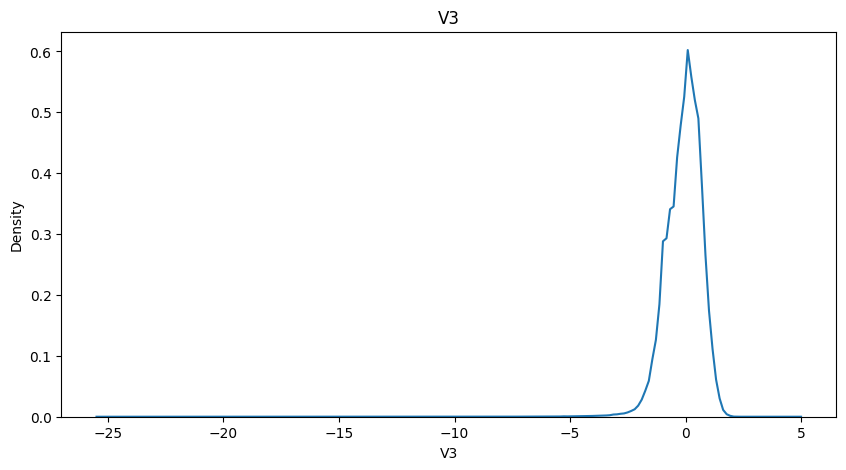

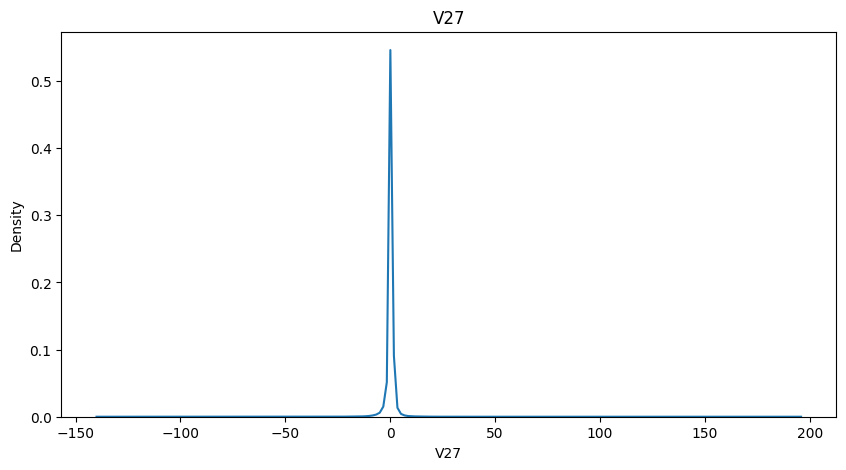

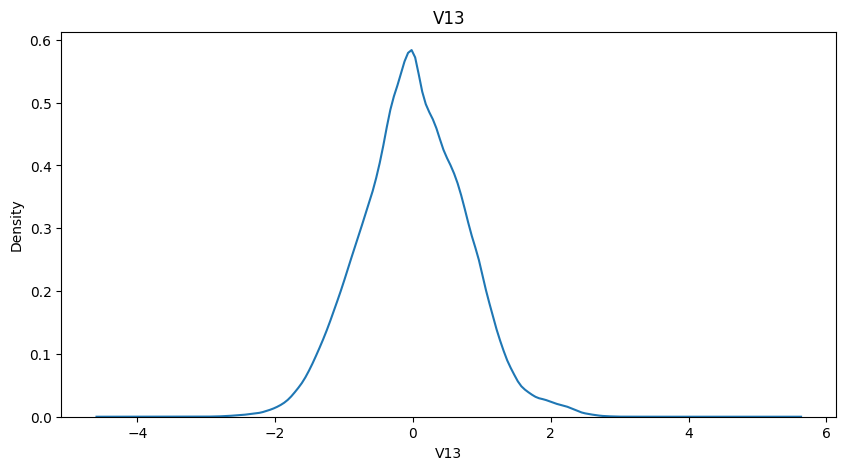

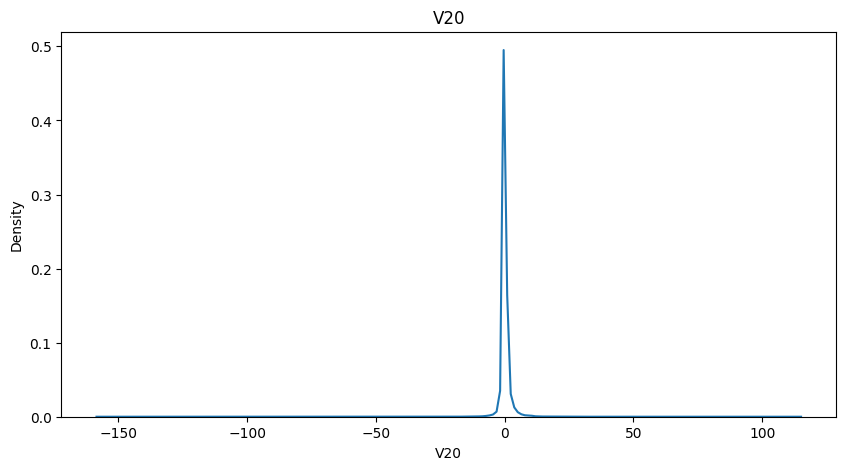

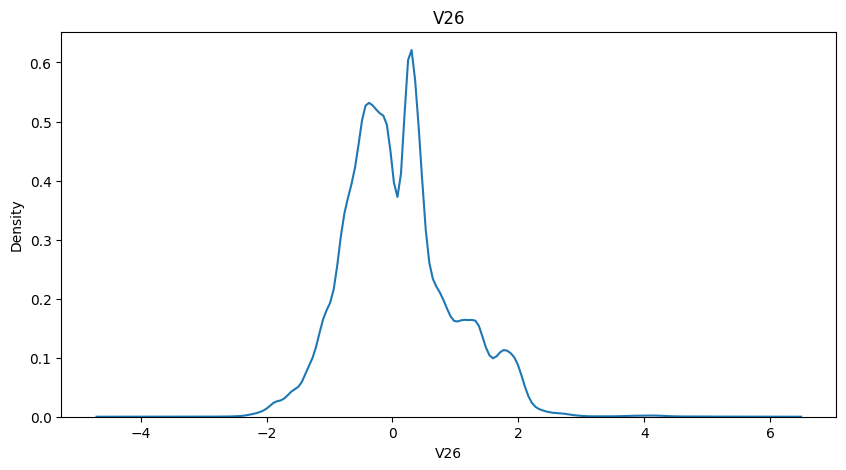

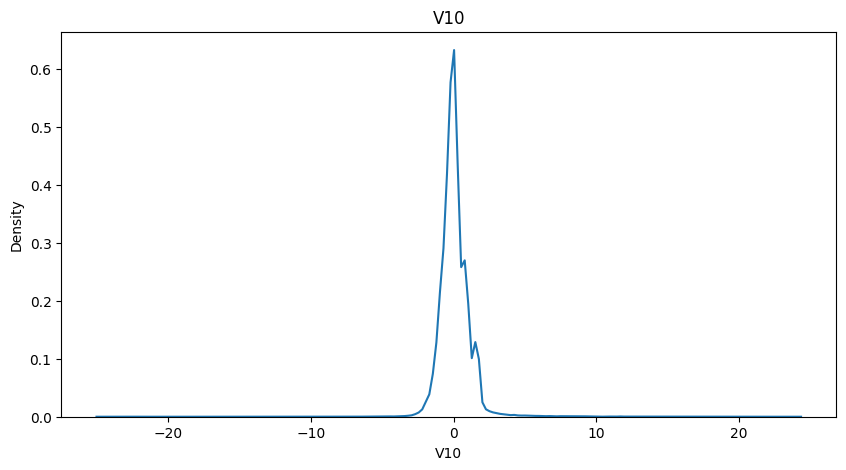

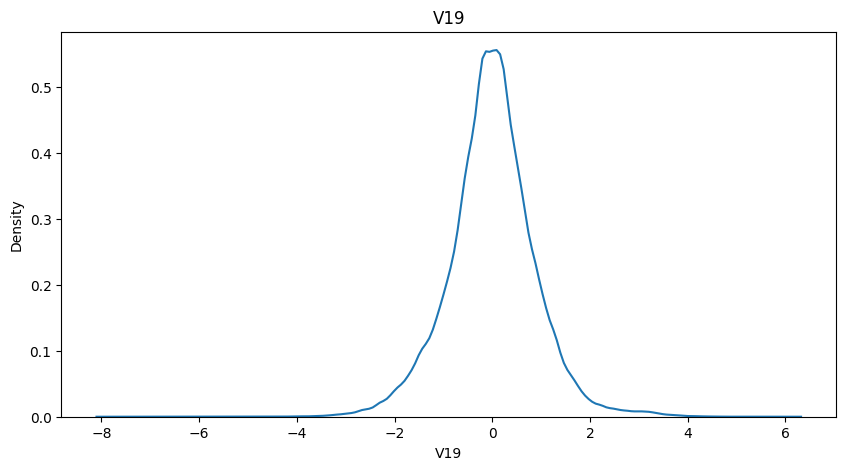

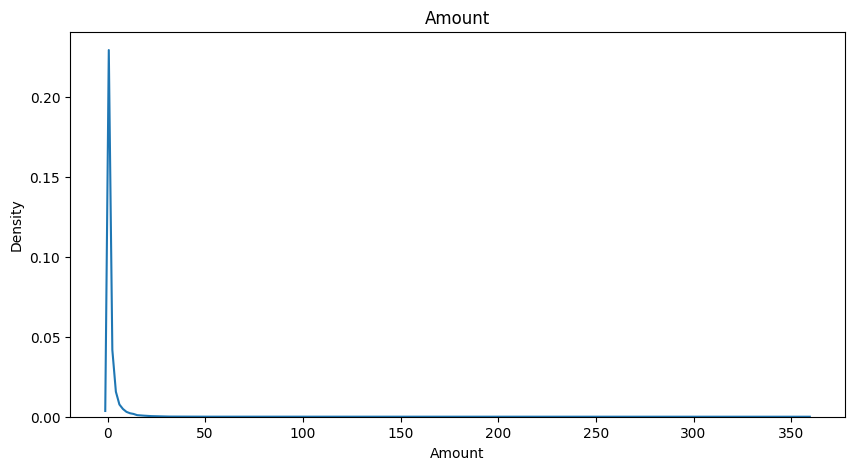

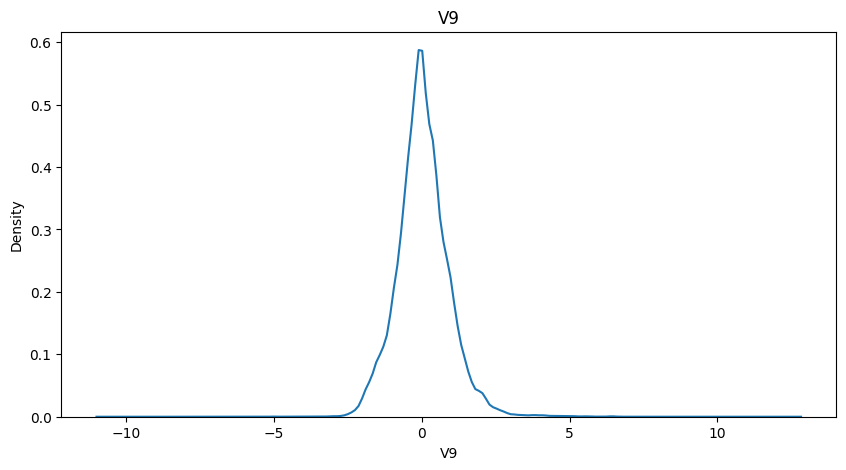

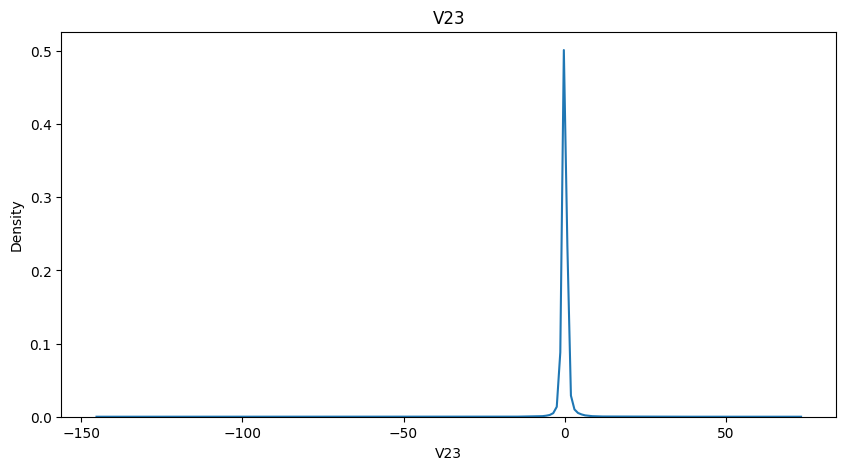

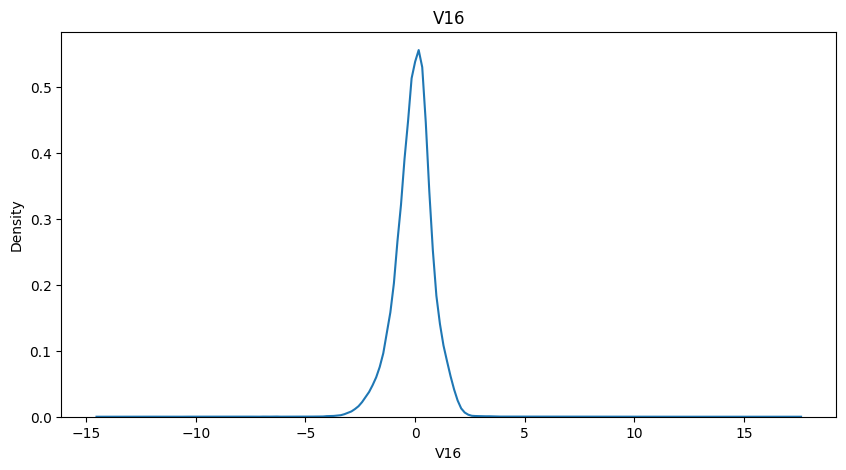

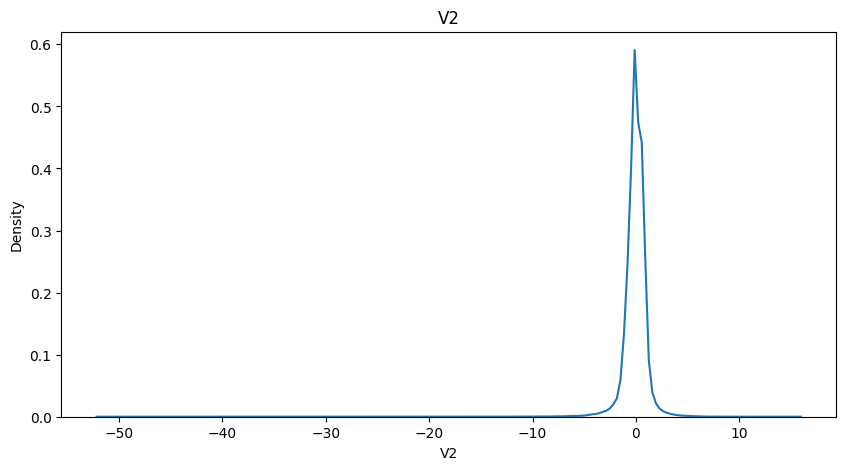

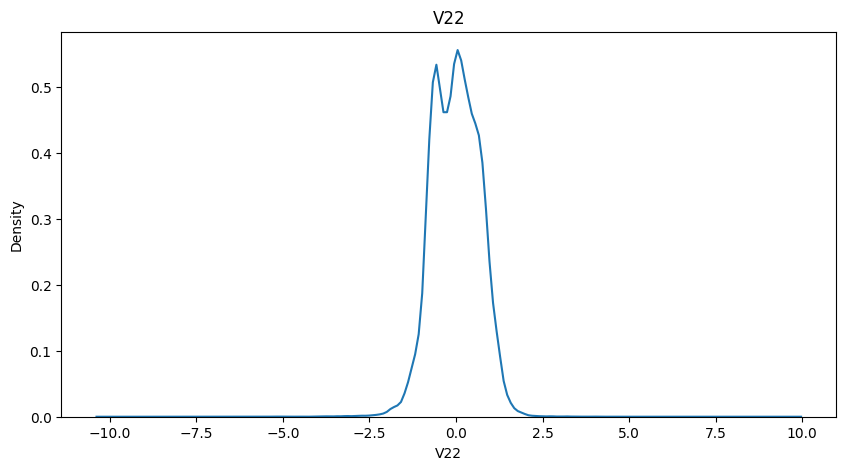

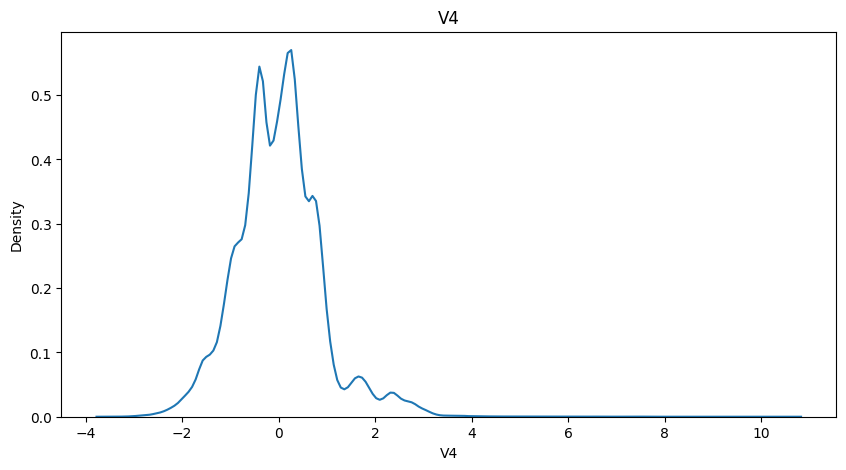

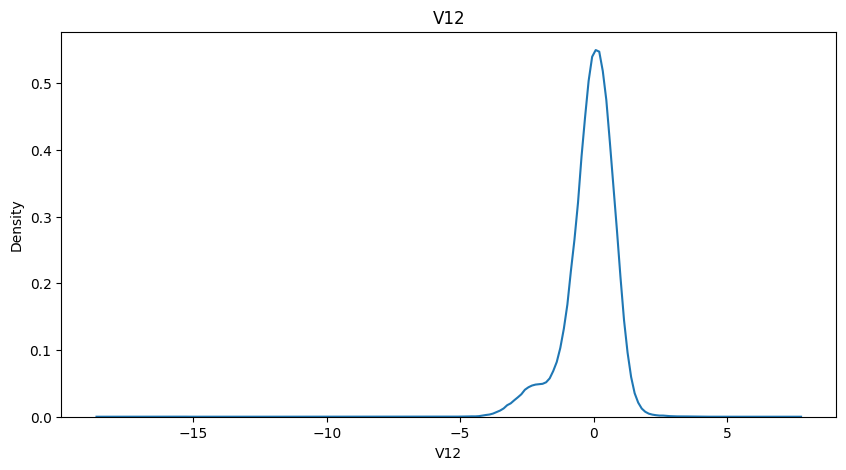

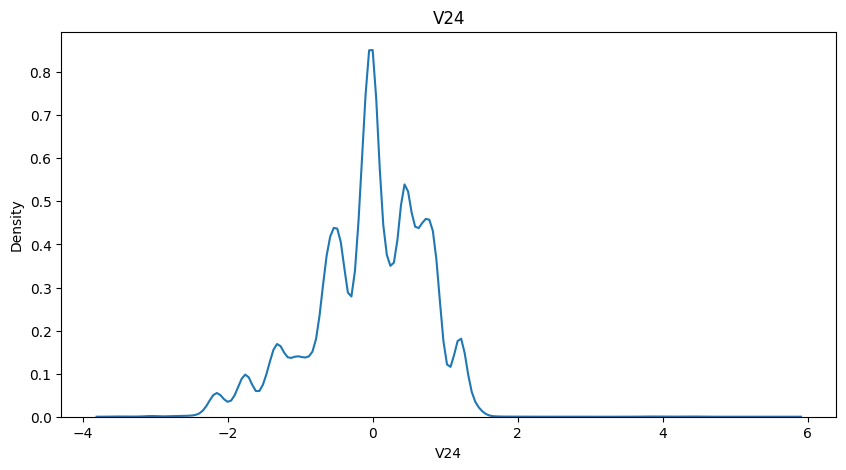

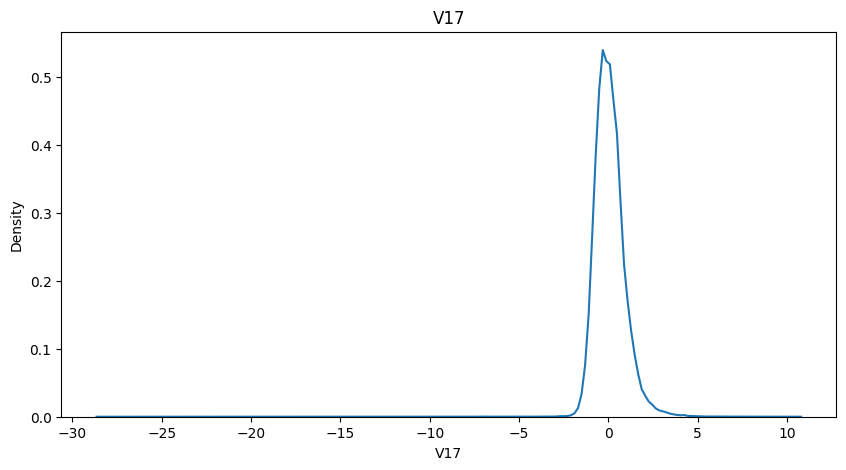

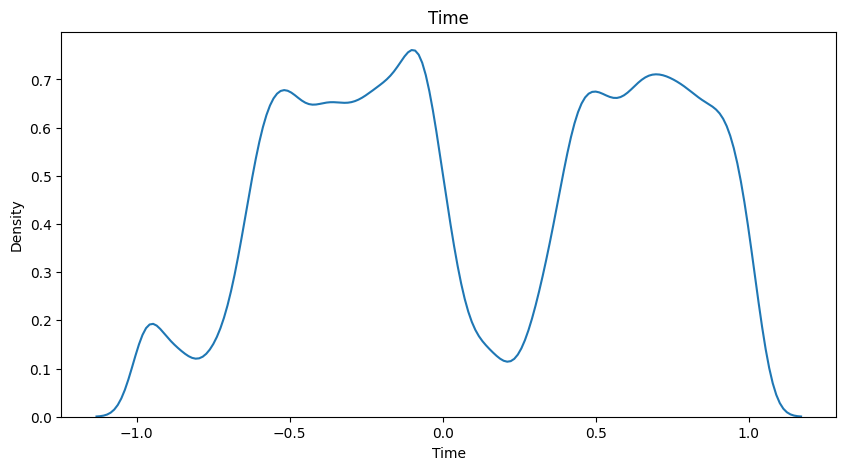

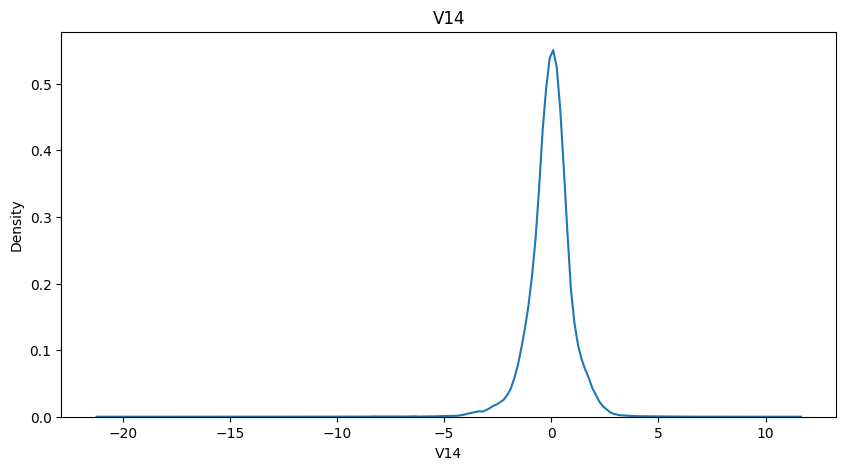

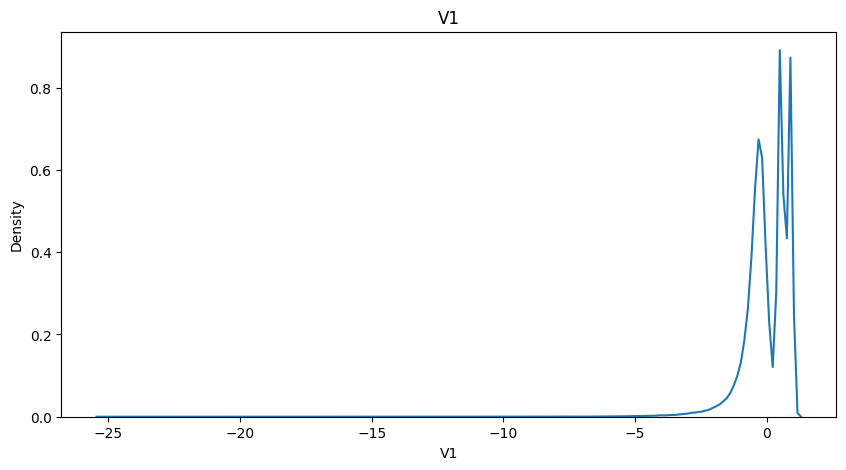

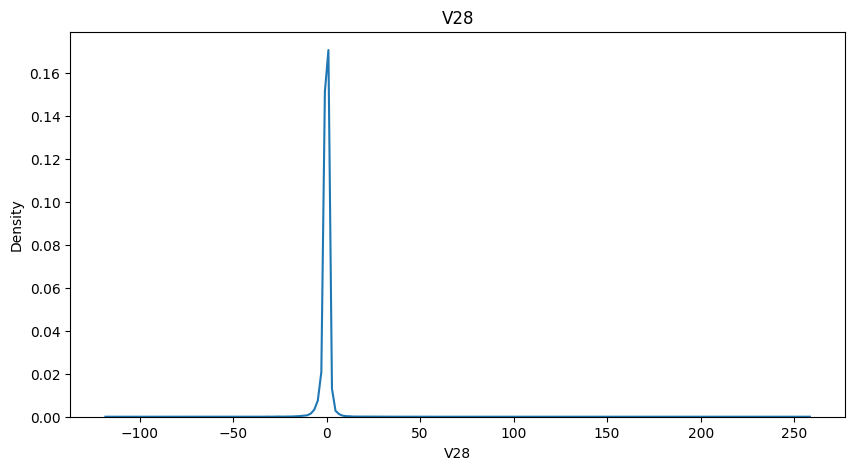

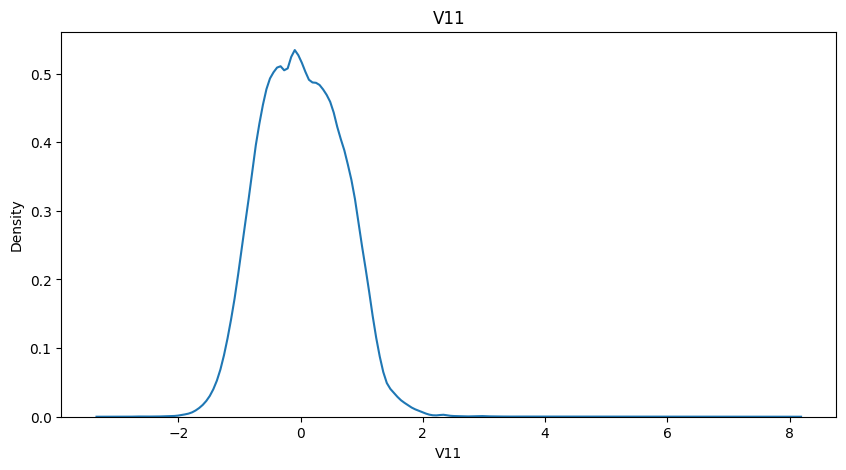

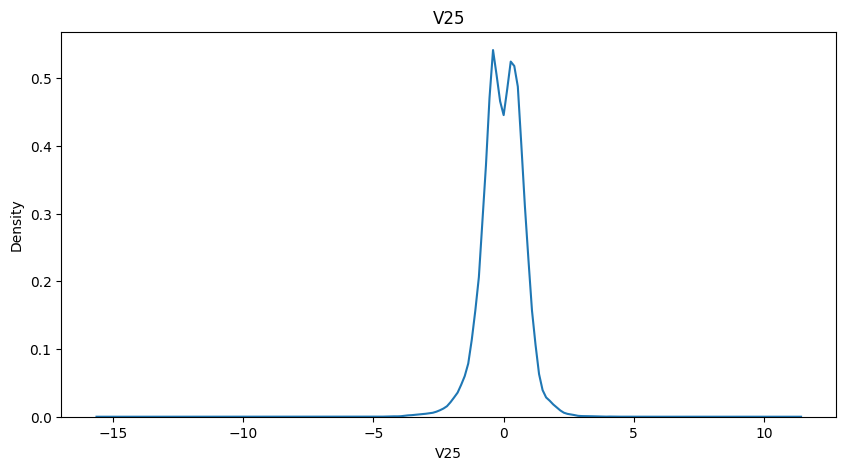

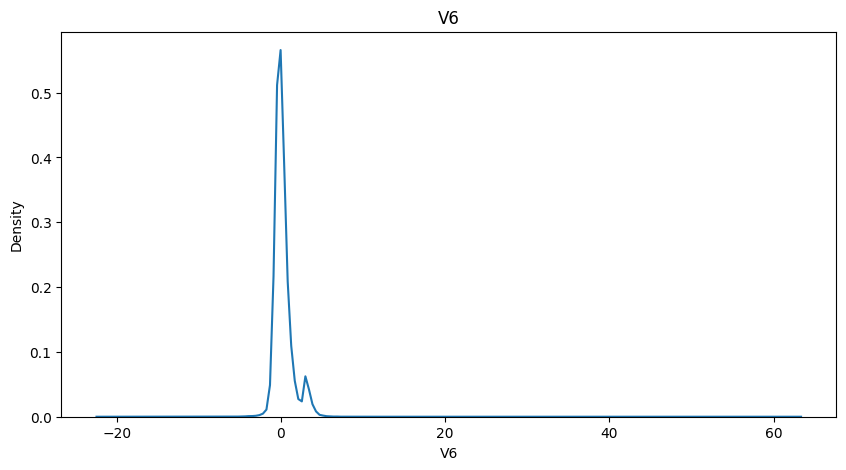

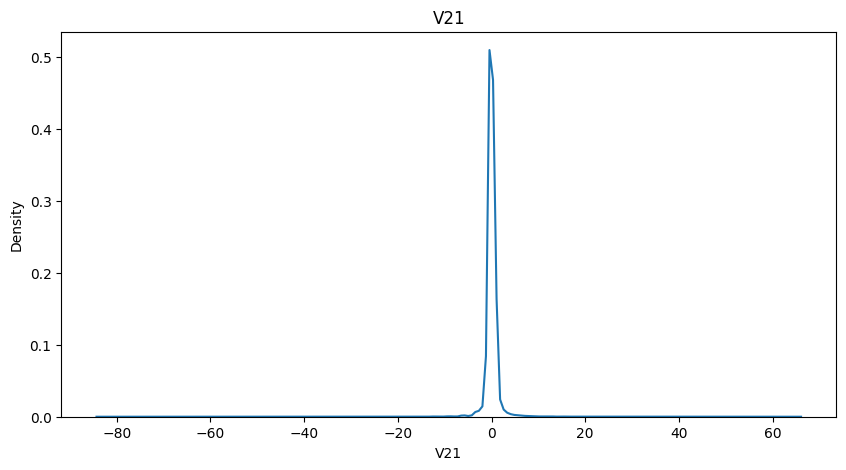

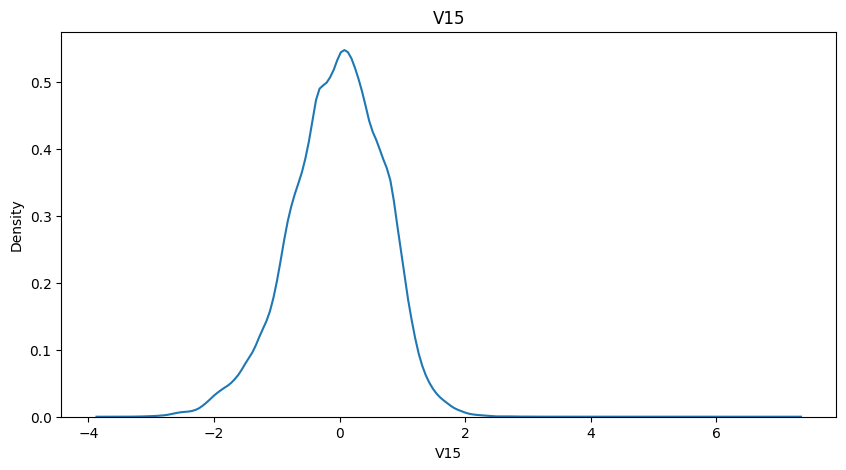

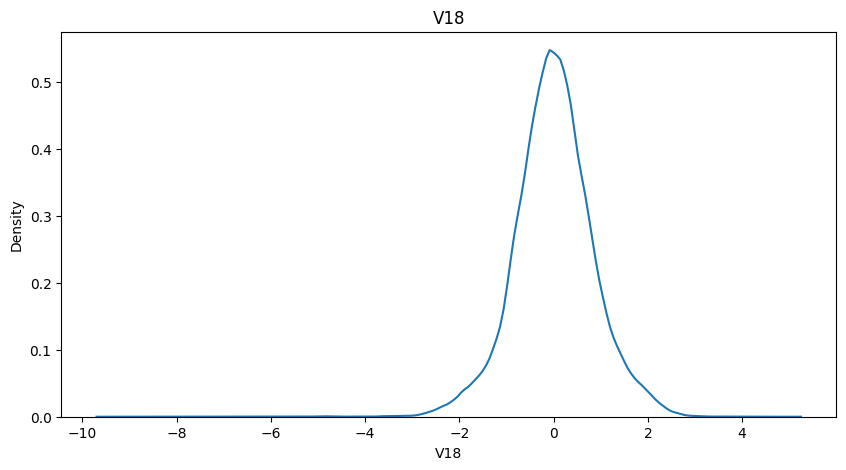

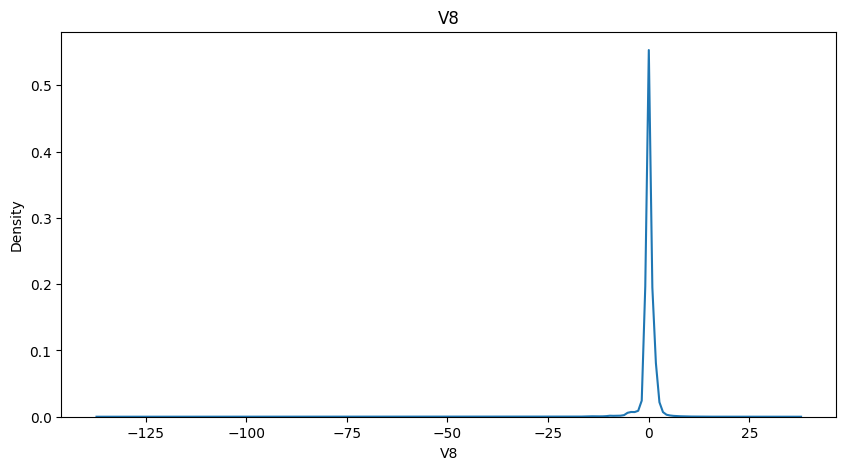

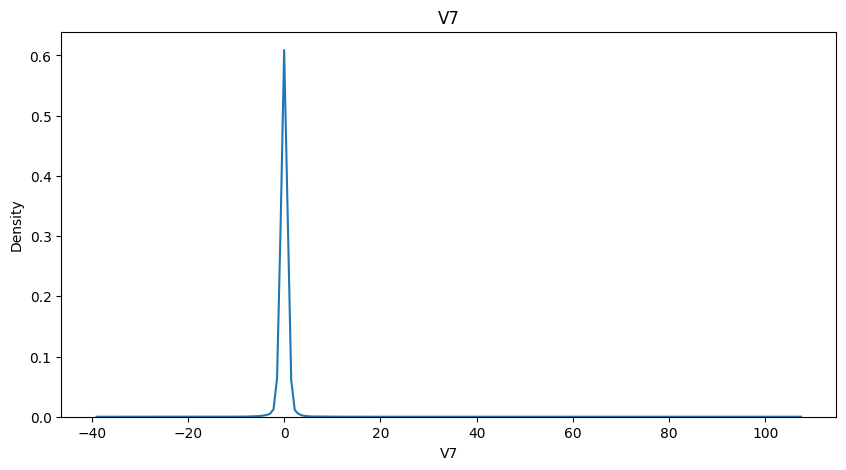

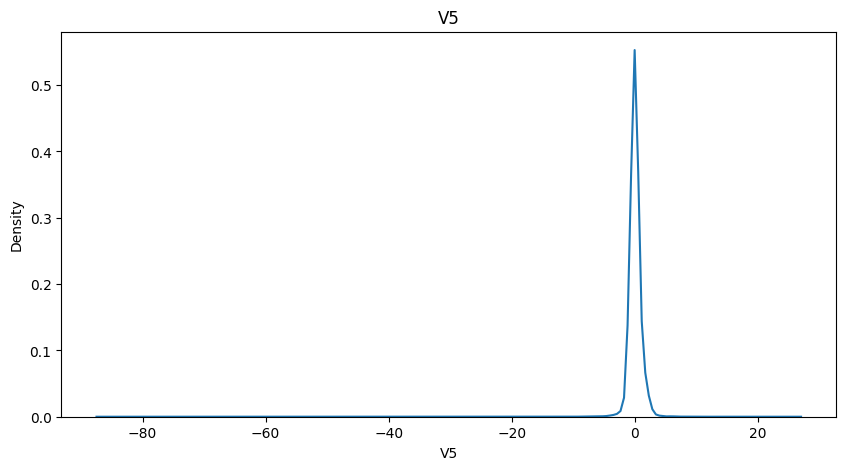

In [14]:
for col in cont_feat :
    plt.figure(figsize=[10,5])
    plt.title(col)
    sns.kdeplot(df[col])

Il est un peu difficile d'étudier les features étant donné que nous ne savons pas à quoi ils font référence.

### Machine Learning

### Random Forest

Un des grands défis du machine learning ces dernières années est l’explicabilité (ou interprétabilité) des modèles.

Son efficacité est assez bonne et on a des techniques pour interpréter les résultats. On peut par exemple déterminer quelles sont les features qui ont été déterminantes pour l’obtention d’une prédiction. Random forest offre une meilleur transparence sur l’utilisation faites des données d’entrainement.

On construit les ensembles d'apprentissage et de test :

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

On teste les forêts aléatoires :

In [16]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [17]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.75      0.83        87

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Le modèle possède une précision de 1, ce qui est un trés bon résultat.

In [18]:
pd.crosstab(y_test, y_rf, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
Reel,,,
0,56870,5,56875
1,22,65,87
All,56892,70,56962


#### *Sous-échantillonage:*

Il y a beaucoup moins de transaction frauduleuses que de transactions non-frauduleuses.

On va garder autant de transactions non-frauduleuses que de frauduleuse dans l'ensemble d'apprentissage (X_train), en tirant aléatoirement ceux qu'on va garder On dit qu'on "sous-échantillonne la classe majoritaire"

In [20]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

On vérifie qu'on a bien équilibré l'ensemble d'apprentissage :

In [21]:
y_train.value_counts()

Class
0    405
1    405
Name: count, dtype: int64

On applique les forêts aléatoires sur le nouvel ensemble d'apprentissage:

In [22]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

print(classification_report(y_test, y_rf))

pd.crosstab(y_test, y_rf, rownames=['Reel'], colnames=['Prediction'], margins=True)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.06      0.87      0.11        87

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Prediction,0,1,All
Reel,,,
0,55622,1253,56875
1,11,76,87
All,55633,1329,56962


On a moins de données d'apprentissage, mais les résultats sont un peu meilleurs pour la détection de fraude (77 sur 87).

In [43]:
import joblib

# Sauvegarder du modèle
joblib.dump(rf, "models/random_forest_model.pkl")
print("Modèle sauvegardé avec succès.")

Modèle sauvegardé avec succès.


#### *Suréchantillonnage:*

On va rééquilibrer le dataset en sur-échantillonnant la classe minoritaire :

La méthode SMOTE (Synthetic Minority Oversampling TEchnique) consiste à synthétiser des éléments pour la classe minoritaire, à partir de ceux qui existent déjà. Elle fonctionne en choisissant au hasard un point de la classe minoritaire et en calculant les k-voisins les plus proches pour ce point. Les points synthétiques sont ajoutés entre le point choisi et ses voisins.

On crée donc de "fausses données" (mais "vraisemblables") pour l'apprentissage:

In [23]:
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

On a bien équilibré l'ensemble d'apprentissage (en "ajoutant" des données) :

In [25]:
y_train.value_counts()

Class
0    227440
1    227440
Name: count, dtype: int64

On teste les forêts aléatoires avec les données suréchantillonnées :

In [26]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [27]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.86      0.78      0.82        87

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
pd.crosstab(y_test, y_rf, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
Reel,,,
0,56864,11,56875
1,19,68,87
All,56883,79,56962


Les résultats sont bons mais moins que ceux des deux modèles précédents.

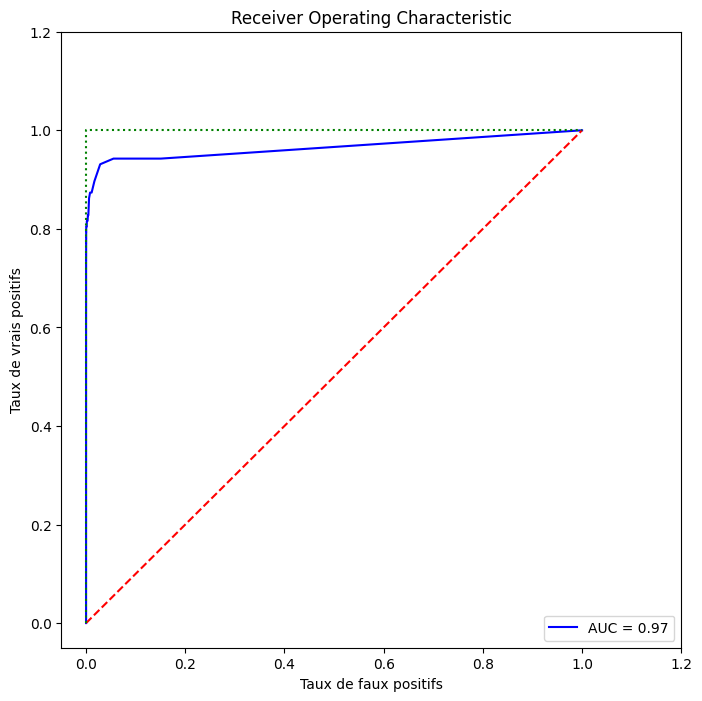

In [29]:
plot_roc_curve(rf,X_test,y_test)

### Extreme Gradient Boosting : XGBoost avec suréchantillonage SMOTE

XGBoost utilise des arbres de décision (comme Random Forest) pour résoudre des problèmes de classification ce qui se réfère à notre problème.

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(xgb.score(X_test,y_test))

0.9992977774656788


In [32]:
y_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.76      0.79      0.78        87

    accuracy                           1.00     56962
   macro avg       0.88      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [33]:
pd.crosstab(y_test, y_xgb, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
Reel,,,
0,56853,22,56875
1,18,69,87
All,56871,91,56962


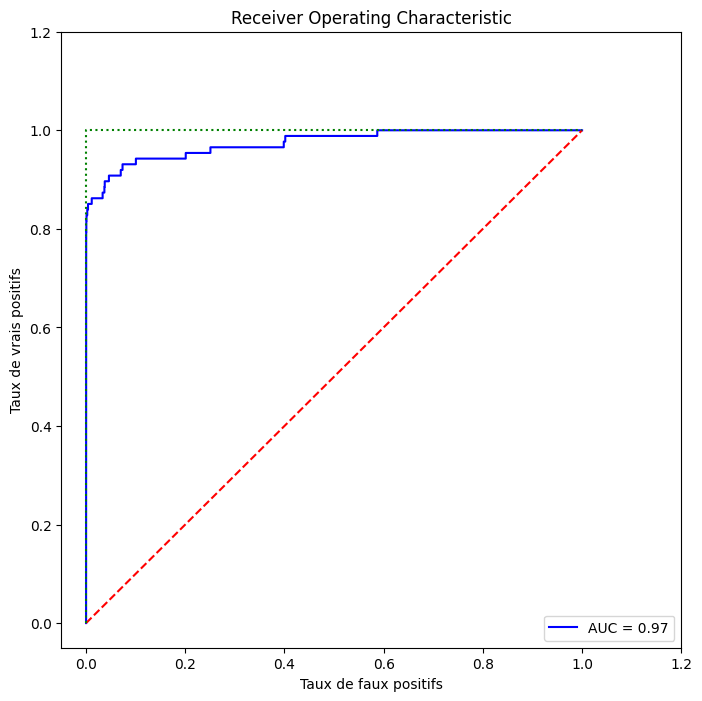

In [34]:
plot_roc_curve(xgb,X_test,y_test)

In [35]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.76      0.79      0.78        87

    accuracy                           1.00     56962
   macro avg       0.88      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



### XGBoost pondéré

On va utiliser une amélioration de la méthode XGBoost, sans suréchantillonage.

On reconstitue les jeux de données sans échantillonnage :

In [36]:
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

On utilise le paramètre scale_pos_weight pour donner plus d'impact aux erreurs commises sur la classe minoritaire :

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier(scale_pos_weight=2278/388)
# xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_xgb = xgb.predict(X_test)

In [39]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.78      0.85        87

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [40]:
pd.crosstab(y_test, y_xgb, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
Reel,,,
0,56870,5,56875
1,19,68,87
All,56889,73,56962


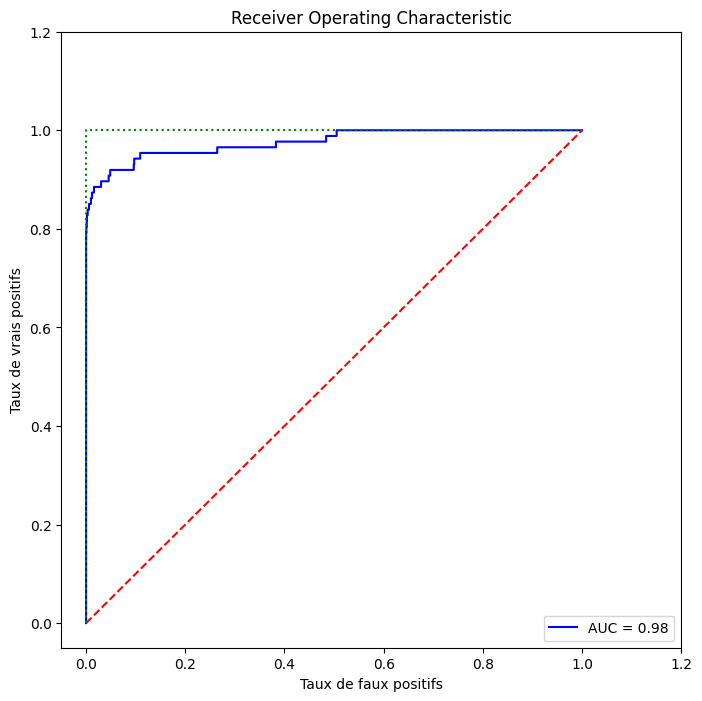

In [41]:
plot_roc_curve(xgb,X_test,y_test)

En conclusion, notre problème peut être résolu grâce à plusieurs modèle qui possèdent tous des précsions équivalentes: Random Forest et XGBoost. Malgrè le deséquilibre dans notre dataset, les résultats sont assez bons, en revanche, les méthodes de sur-échantillonage et de sous-échantillonage n'améliorent pas la performance des algorithmes.